## Week 5 - Classification Coding Test
---
### [문제 정의]
The competition is simple: use machine learning to create a model that predicts which Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

**The Challenge**  
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

**What Data Will I Use in This Competition?**  
In this competition, you’ll gain access to two similar data sets that include Customer information like Gender, age, Education, etc. One data set is titled madfhantr.csv is a train data set and the other is titled madhante.csv is a test dataset.
madfhantr.csv will contain the details of a subset of the customer loan eligibility process (614 to be exact) and importantly, will reveal whether they are eligible loan yes or not for loan amount so that they can specifically target these customers "Loanstatus" . The madhante.csv data set contains similar information but does not disclose the “Loanstatus” for each customer It’s your job to predict these outcomes.
Using the patterns you find in the madfhantr.csv data, predict whether the other 614 customer on board (found in madhante.csv) loan eligible.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kaggle

###  [문제 구성]
1. EDA  
    
2. Data Preprocessing  
    
3. Modeling  

4. Evaluation

5. Visualization

### 0. Import Package

In [41]:
#Dataset Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Sklearn Package
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve, mean_squared_error, mean_absolute_error

#Ensemble Package
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### 1. Exploratory Data Analysis (EDA)
    * Data Understanding
    * Information
    * Description
    * Feature Selection

In [6]:
loan_df = pd.read_csv('madfhantr.csv')
loan_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
print('데이터 세트의 Shape:', loan_df.shape)
print('\n 전체 피처의 type \n', loan_df.dtypes.value_counts())
isnull_series = loan_df.isnull().sum()
print('\n Null 칼럼과 그 건수', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (614, 13)

 전체 피처의 type 
 object     8
float64    4
int64      1
dtype: int64

 Null 칼럼과 그 건수 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


### 2. Data Preprocessing
    * Missing Value Processing
    * Outlier Processing
    * Feature Engineering

In [18]:
loan_df.drop(['Loan_ID'], axis=1, inplace=True)

loan_df.fillna(loan_df.mean(), inplace=True)

In [19]:
null_column_count = loan_df.isnull().sum()[loan_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', loan_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 Gender           object
Married          object
Dependents       object
Self_Employed    object
dtype: object


In [20]:
loan_df_ohe = pd.get_dummies(loan_df)

print('get_dummies() 수행 후 데이터 Shape:', loan_df_ohe.shape)

print('## Null 피처의 Type : \n', loan_df_ohe.isnull().sum())

get_dummies() 수행 후 데이터 Shape: (614, 22)
## Null 피처의 Type : 
 ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_N              0
Loan_Status_Y              0
dtype: int64


In [23]:
loan_df_ohe.drop(['Loan_Status_N'], axis=1, inplace=True)

(array([192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 422.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

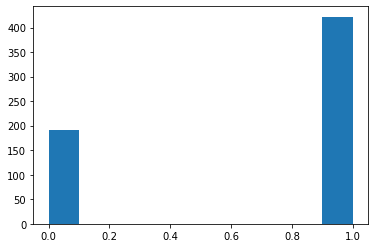

In [29]:
plt.hist(loan_df_ohe['Loan_Status_Y'], bins=10)

### 3. Modeling
    * Selection, Hyper Parameter Control
    * Training / Prediction / Testing  

In [35]:
x = loan_df_ohe.iloc[:, :-1]
y = loan_df_ohe.iloc[:,-1]

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=156, stratify=y)

In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [43]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

## 4. Evaluation
    * Accuracy / Recall / Precision / F1 Score

In [44]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[16 22]
 [ 0 85]]
정확도: 0.8211, 정밀도: 0.7944, 재현율: 1.0000,    F1: 0.8854, AUC:0.8173


## 5. Visualization